In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [3]:
data = pd.read_csv('NORMAL_DLY_sample_csv.csv')

In [4]:
print(data.columns)

Index(['STATION', 'STATION_NAME', 'ELEVATION', 'LATITUDE', 'LONGITUDE', 'DATE',
       'DLY-TMIN-NORMAL', 'DLY-TMAX-NORMAL', 'MTD-PRCP-NORMAL'],
      dtype='object')


In [5]:
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y%m%d')

In [14]:
data['TAVG'] = ((data['DLY-TMIN-NORMAL'] / 10) + (data['DLY-TMAX-NORMAL'] / 10)) / 2

In [18]:
data['PRCP'] = (data['MTD-PRCP-NORMAL'] / 10).fillna(0)

In [8]:
data['Extreme_Heat'] = data['DLY-TMAX-NORMAL'] > 95
data['Extreme_Cold'] = data['DLY-TMIN-NORMAL'] < 32
data['Heavy_Rain'] = data['PRCP'] > 1

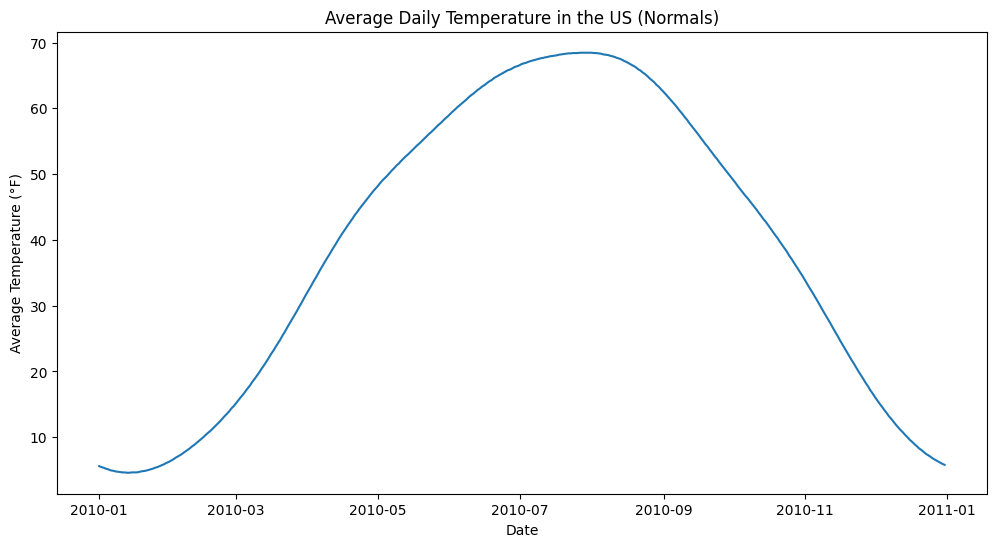

In [15]:
plt.figure(figsize=(12,6))
sns.lineplot(x='DATE', y='TAVG', data=data)
plt.title('Average Daily Temperature in the US (Normals)')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°F)')
plt.show()

# This plot shows the average daily temperature across the US throughout the year, highlighting seasonal variations.

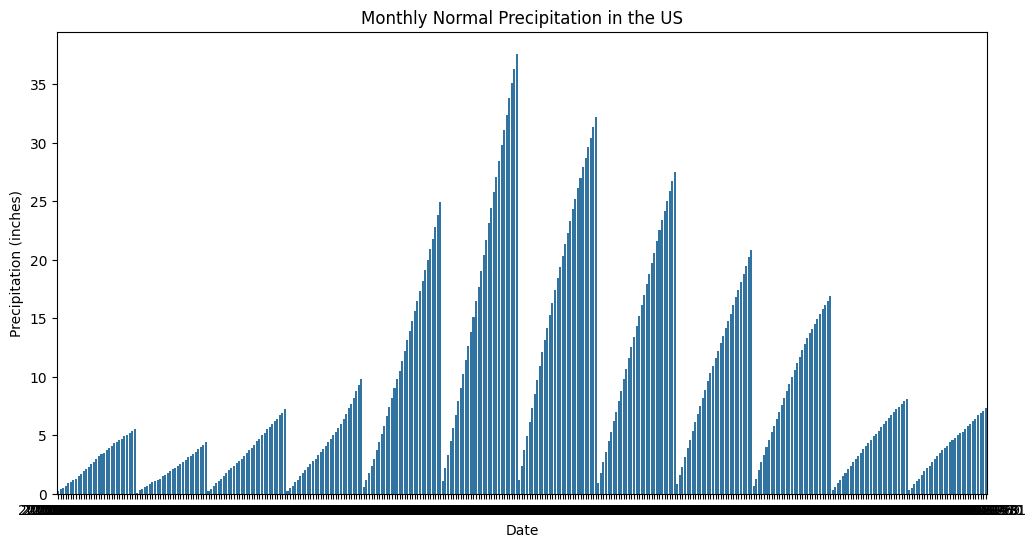

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(x='DATE', y='PRCP', data=data)
plt.title('Monthly Normal Precipitation in the US')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.show()

# This plot displays the normal monthly precipitation in the US, indicating wetter and drier periods during the year.

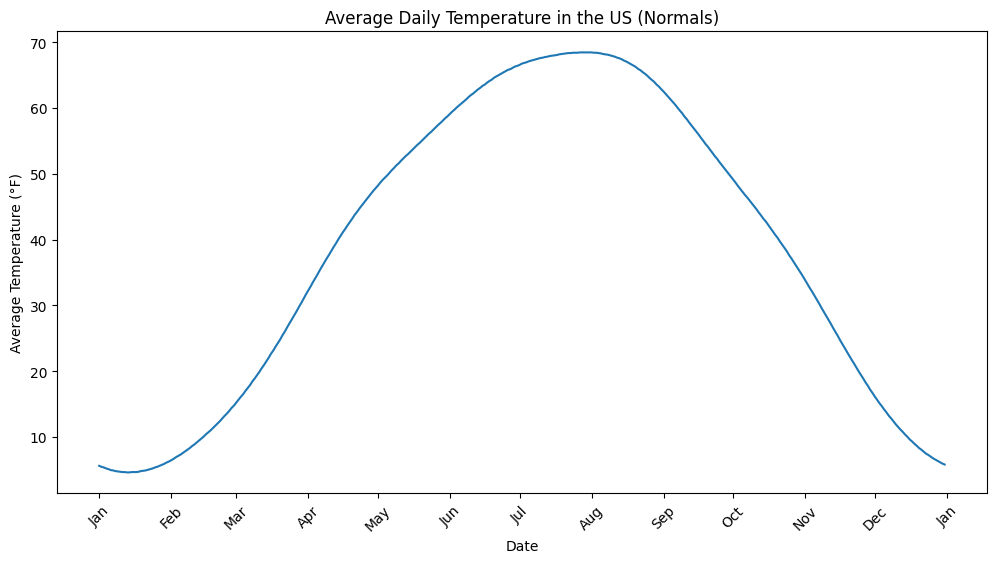

In [16]:
plt.figure(figsize=(12,6))
plt.plot(data['DATE'], data['TAVG'], marker='', linestyle='-')
plt.title('Average Daily Temperature in the US (Normals)')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°F)')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=45)

plt.show()

# This plot shows the average daily temperature across the US with months labeled

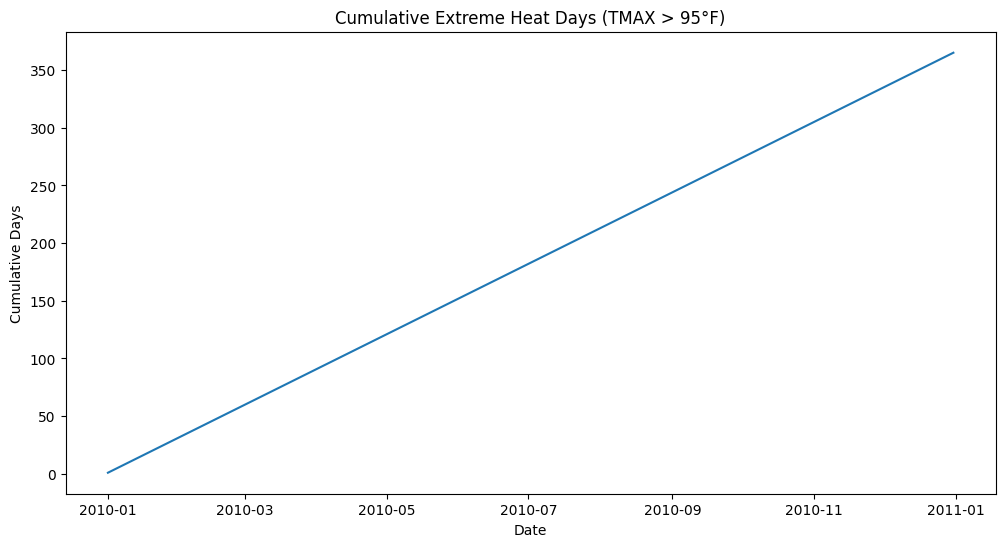

In [22]:
data['Cumulative_Heat'] = data['Extreme_Heat'].cumsum()

plt.figure(figsize=(12,6))
sns.lineplot(x='DATE', y='Cumulative_Heat', data=data)
plt.title('Cumulative Extreme Heat Days (TMAX > 95°F)')
plt.xlabel('Date')
plt.ylabel('Cumulative Days')
plt.show()

# This plot shows the cumulative number of days where the daily maximum temperature goes past 95°F, showing times of extreme heat.

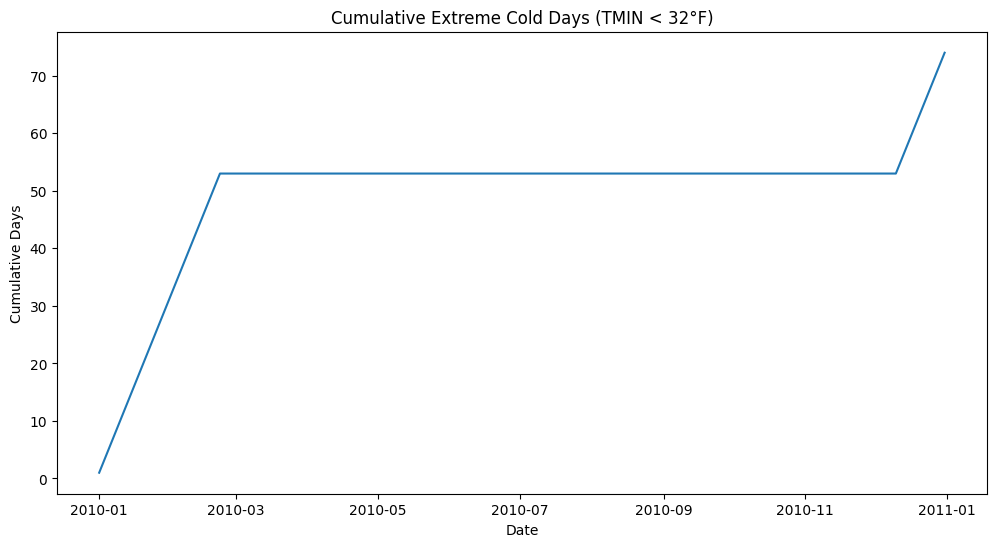

In [21]:
data['Cumulative_Cold'] = data['Extreme_Cold'].cumsum()

plt.figure(figsize=(12,6))
sns.lineplot(x='DATE', y='Cumulative_Cold', data=data)
plt.title('Cumulative Extreme Cold Days (TMIN < 32°F)')
plt.xlabel('Date')
plt.ylabel('Cumulative Days')
plt.show()

# This plot shows the cumulative number of days where the daily minimum temperature gets below 32°F, showing times of extreme cold.
